<h1 align="center"> Predicting the Next Crypto Coin/Token Star Using Machine Learning </h1>

<h2 align="center"> Advanced Seminar Information Management </h2>

<h3 align="center"> Supervisor Prof. Dr. Schoder </h3>
  
<h4 align="center"> Pascal Grewe & Andrej Kotsovolos </h4>


<h1>1. Data Collection <h1>

In [1]:
# import free Python Coin Gecko API
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### Coin Data

In [2]:
# get date for each row normal datetime format instead of unix in each cell
# start with input date and add one day with each next row 
def add_date(year, month, day, coin):
    size = int(coin.size/4)
    date = datetime(year, month, day)
    
    for i in range(size):
        coin.iloc[i,3] = date 
        date = date + timedelta(1)

In [3]:
# cut unix datetime from each cell
def cut_date(column, dataframe):
    length = (int(dataframe.size/3))
    df = []

    for i in range(length):
        c = (dataframe[column].iloc[i])
        c.remove(c[0])
        df.append(c)
    
    dataframe[column] = pd.DataFrame.from_dict(df)
    return dataframe[column]

In [4]:
# get coin data for specific coin from 01-01-2018 00:00:00 to 26-04-2022 00:00:00
# start_date and end_date have to be in UNIX format 
def get_coin_data(name, start_date, end_date):
    coin = cg.get_coin_market_chart_range_by_id(id = name, vs_currency='usd', from_timestamp = start_date, to_timestamp=end_date)
    coin = pd.DataFrame.from_dict(coin)
    
    # cut unix date from dataframe
    cut_date('prices', coin)
    cut_date('market_caps', coin)
    cut_date('total_volumes', coin)
    
    # create new column for date
    coin['date'] = 1 
    # enter start date of data y,m,d
    add_date(2018, 1, 1, coin)
    # set date as index
    coin = coin.set_index(coin['date'])
    #drop date column
    coin = coin.drop('date', 1)
    
    coin.to_csv(name + '.csv', index = True)
    
    return coin

In [5]:
# enter list of coins and get csv of them
def all_coins(names, start_date, end_date):
    for i in names:
        get_coin_data(i, start_date, end_date)

In [6]:
# function that reads the csv and sets the index back to date
def read(file_name):
    return pd.read_csv(file_name).set_index('date')

In [7]:
# list all your desired coins here
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche-2", "stellar", "monero"]

In [9]:
# get all coin data for coins from list for timespan
all_coins(coin_list, '1514761200', '1650924000')

/var/folders/_m/71fq0nk106s02qxvct5s2sv80000gn/T/ipykernel_23973/425749103.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coin = coin.drop('date', 1)


In [10]:
bitcoin = read('bitcoin.csv')

In [11]:
ethereum = read('ethereum.csv')

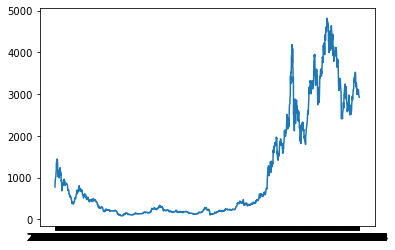

In [12]:
plt.figure()
plt.plot(ethereum['prices'])

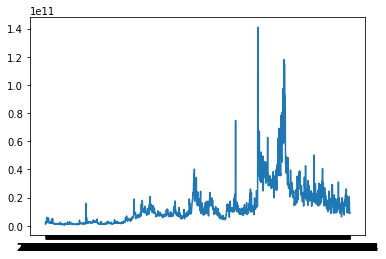

In [13]:
plt.figure()
plt.plot(ethereum['total_volumes'])

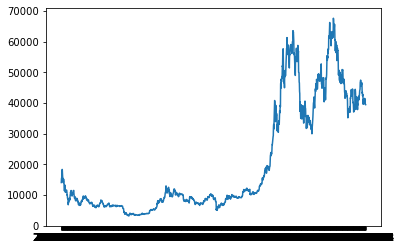

In [14]:
plt.figure()
plt.plot(bitcoin['prices'])

#### OHLC

Keine Ahnung was und das bringt

In [15]:
bitcoin_ohlc = pd.DataFrame.from_dict(cg.get_coin_ohlc_by_id(id = 'bitcoin', vs_currency='usd', days = 'max'))

In [16]:
bitcoin_ohlc

,0,1,2,3,4
0,1367280000000,135.30,141.96,135.30,135.30
1,1367539200000,117.00,117.00,91.01,91.01
2,1367884800000,111.25,118.33,106.40,106.40
3,1368230400000,112.64,118.78,112.64,113.01
4,1368576000000,114.71,117.18,114.16,114.16
...,...,...,...,...,...
859,1651881600000,37758.50,39699.02,36116.39,36116.39
860,1652227200000,35573.31,35573.31,30269.59,31026.93
861,1652572800000,28913.49,30189.33,28913.49,30189.33
862,1652918400000,31319.31,31319.31,28772.20,28772.20


### Asset Platforms

Keine Ahnnung was uns das bringt

In [17]:
asset = pd.DataFrame.from_dict(cg.get_asset_platforms())

In [18]:
asset

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
102,evmos,9001.0,Evmos,evmos
103,,NaN,CoinEx Smart Chain,CSC
104,,NaN,Everscale,
105,conflux,NaN,Conflux,conflux


### Contracts

Keine Ahnung was das ist und scheint es auch nicht für jeden Coin so zu geben?

### Categories

In [19]:
categories = pd.DataFrame.from_dict(cg.get_coins_categories())

In [20]:
categories

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.319447e+11,1.534066,,[https://assets.coingecko.com/coins/images/279...,9.195124e+10,2022-05-23T18:11:50.267Z
1,smart-contract-platform,Smart Contract Platform,4.198074e+11,2.622472,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.528856e+10,2022-05-23T18:11:36.712Z
2,binance-smart-chain,BNB Chain Ecosystem,2.713178e+11,1.689703,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,6.598447e+10,2022-05-23T18:11:48.271Z
3,polygon-ecosystem,Polygon Ecosystem,2.613406e+11,1.583150,,[https://assets.coingecko.com/coins/images/325...,6.320108e+10,2022-05-23T18:11:18.989Z
4,avalanche-ecosystem,Avalanche Ecosystem,2.461205e+11,1.497471,None,[https://assets.coingecko.com/coins/images/325...,6.063212e+10,2022-05-23T18:11:07.744Z
...,...,...,...,...,...,...,...,...
70,tourism,Tourism,1.194765e+08,0.924928,None,[https://assets.coingecko.com/coins/images/465...,3.600557e+06,2022-05-23T18:11:43.024Z
71,kardiachain-ecosystem,KardiaChain Ecosystem,6.295963e+07,3.706615,,[https://assets.coingecko.com/coins/images/794...,1.822225e+09,2022-05-23T18:11:42.397Z
72,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.364654e+07,1.129495,,[https://assets.coingecko.com/coins/images/215...,1.710402e+05,2022-05-23T18:11:45.963Z
73,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,1.985747e+04,2022-05-23T18:11:32.209Z


In [21]:
categories_list = pd.DataFrame.from_dict(cg.get_coins_categories_list())

In [22]:
categories_list

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
133,wrapped-tokens,Wrapped-Tokens
134,yearn-yfi-partnerships-mergers,Yearn Ecosystem
135,yield-aggregator,Yield Aggregator
136,yield-farming,Yield Farming


### Exchanges

Zeug zu Handelsplattformen

In [23]:
exchange_list = pd.DataFrame.from_dict(cg.get_exchanges_list())

In [24]:
exchange_list

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10,1,454562.259696,454562.259696
1,ftx_spot,FTX,2019.0,Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,False,10,2,63136.603812,63136.603812
2,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,False,10,3,62348.838667,62348.838667
3,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,False,10,4,52364.775645,52364.775645
4,okex,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,False,10,5,46379.815128,46379.815128
...,...,...,...,...,...,...,...,...,...,...,...,...
95,bitvavo,Bitvavo,2018.0,Netherlands,,https://bitvavo.com/en,https://assets.coingecko.com/markets/images/71...,False,6,96,2980.967148,2980.967148
96,coinone,Coinone,2016.0,South Korea,,https://coinone.co.kr/,https://assets.coingecko.com/markets/images/20...,False,6,97,2923.019234,2923.019234
97,biswap,Biswap,NaN,None,,https://biswap.org/,https://assets.coingecko.com/markets/images/74...,False,6,98,2688.997487,2688.997487
98,uniswap_v2,Uniswap (v2),2018.0,None,,https://app.uniswap.org/#/swap?use=V2,https://assets.coingecko.com/markets/images/53...,False,6,99,2628.980468,2628.980468


In [25]:
supported_markets = pd.DataFrame.from_dict(cg.get_exchanges_id_name_list())

In [26]:
supported_markets 

,id,name
0,1bch,1BCH
1,aave,Aave
2,aax,AAX
3,aax_futures,AAX Futures
4,abcc,ABCC
...,...,...
610,zilswap,ZilSwap
611,zipmex,Zipmex
612,zipswap,ZipSwap
613,zkswap,ZKSwap (v1)


In [27]:
binance_exchange = cg.get_exchanges_by_id(id = 'binance')

In [28]:
binance_exchange

{'name': 'Binance',
 'year_established': 2017,
 'country': 'Cayman Islands',
 'description': '',
 'url': 'https://www.binance.com/',
 'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
 'facebook_url': 'https://www.facebook.com/binanceexchange',
 'reddit_url': 'https://www.reddit.com/r/binance/',
 'telegram_url': '',
 'slack_url': '',
 'other_url_1': 'https://medium.com/binanceexchange',
 'other_url_2': 'https://steemit.com/@binanceexchange',
 'twitter_handle': 'binance',
 'has_trading_incentive': False,
 'centralized': True,
 'public_notice': '',
 'alert_notice': '',
 'trust_score': 10,
 'trust_score_rank': 1,
 'trade_volume_24h_btc': 453344.4222024784,
 'trade_volume_24h_btc_normalized': 453344.4222024784,
 'tickers': [{'base': 'BUSD',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 1.0011,
   'volume': 949183528.9933074,
   'converted_last': {'btc': 3.327e-05, 'eth

In [29]:
volume_chart = cg.get_exchanges_volume_chart_by_id(id='binance', days = '90')

In [30]:
volume_chart

[[1645640400000.0, '363959.50732303284822145006542173561'],
 [1645726800000.0, '708394.51837232405903632426581943282'],
 [1645813200000.0, '516787.08403607814442636132563810195'],
 [1645899600000.0, '321955.35090947842624375017877433562'],
 [1645986000000.0, '302368.145387975784849858595249395'],
 [1646072400000.0, '447343.16988632010539621060669964747'],
 [1646158800000.0, '529714.0039267420101448611297322443'],
 [1646245200000.0, '432294.09702193657039533293257918617'],
 [1646331600000.0, '335752.54010408525124497773990539926'],
 [1646418000000.0, '375867.0739079929278263048651671127'],
 [1646504400000.0, '298985.43739703385603612312122172263'],
 [1646590800000.0, '249592.14406505019937067567528361488'],
 [1646677200000.0, '361525.16967266765665674607561608136'],
 [1646763600000.0, '394028.28461520226705821140040514444'],
 [1646850000000.0, '428235.05973527401644973812611726532'],
 [1646936400000.0, '451323.39936601542003291025125922108'],
 [1647022800000.0, '398312.46803529090208769

### Indexes

In [31]:
indexes = pd.DataFrame.from_dict(cg.get_indexes())

In [32]:
indexes

,name,id,market,last,is_multi_asset_composite
0,CoinFLEX (Futures) DFN,DFN,CoinFLEX (Futures),NaN,None
1,Perpetual Protocol ZIL,ZIL,Perpetual Protocol,0.110000,None
2,Bibox (Futures) LINK,LINK,Bibox (Futures),0.110000,None
3,CME Bitcoin Futures BTC,BTC,CME Group,0.110000,False
4,Bibox (Futures) XRP,XRP,Bibox (Futures),0.110000,None
5,Bibox (Futures) AXS,AXS,Bibox (Futures),0.110000,None
6,ZBG Futures BSV,BSV,ZBG Futures,0.110000,None
7,MEXC Global (Futures) ATLAS,ATLAS,MEXC Global (Futures),4.543600,None
8,CoinFLEX (Futures) BCHABC,BCHABC,CoinFLEX (Futures),0.000000,None
9,Prime XBT USDC,USDC,Prime XBT,0.000000,None


In [33]:
#indexes_market_id = cg.get_indexes_by_market_id_and_index_id(market_id='binance', id='AAVE')

In [34]:
indexes_list = pd.DataFrame.from_dict(cg.get_indexes_list())

In [35]:
indexes_list

,id,name
0,DFN,CoinFLEX (Futures) DFN
1,ZIL,Perpetual Protocol ZIL
2,LINK,Bibox (Futures) LINK
3,BTC,CME Bitcoin Futures BTC
4,XRP,Bibox (Futures) XRP
...,...,...
2583,DEICPUSDT,.DEICPUSDT
2584,DEMKRUSDT,.DEMKRUSDT
2585,DEYFIIUSDT,.DEYFIIUSDT
2586,DESHIBUSDT,.DESHIBUSDT


### Derivatives

Wahrscheinlich unnötig für uns

In [36]:
derivatives = pd.DataFrame.from_dict(cg.get_derivatives())

In [37]:
derivatives

,market,symbol,index_id,price,price_percentage_change_24h,contract_type,index,basis,spread,funding_rate,open_interest,volume_24h,last_traded_at,expired_at
0,Binance (Futures),BTCUSDT,BTC,30059.89,0.709826,perpetual,30090.535137,0.087263,0.01,0.0100,2.600065e+09,1.089415e+10,1653329902,NaN
1,Bitget Futures,BTCUSDT_UMCBL,BTC,30079.67,0.760189,perpetual,30091.795079,0.012613,0.01,-0.0068,2.380714e+09,5.936388e+09,1653329949,NaN
2,Prime XBT,BTC/USD,BTC,30050.0,0.672378,perpetual,NaN,0.000000,0.03,0.0000,2.339460e+09,2.428279e+08,1653329899,NaN
3,Gate.io (Futures),BTC_USDT,BTC,30085.58,0.831216,perpetual,30080.390000,-0.011335,0.01,0.0100,1.869063e+09,6.361295e+08,1653329857,NaN
4,MEXC Global (Futures),BTC_USDT,BTC,30083.17,0.734974,perpetual,30076.800000,-0.025595,0.01,0.0150,1.728033e+09,5.474257e+08,1653329927,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,FTX (Derivatives),GBTC-0624,GBTC,19.77,1.540436,futures,19.385000,-1.972187,1.36,0.0000,NaN,1.234387e+02,1653310027,1.656101e+09
2978,FTX (Derivatives),PENN-0624,PENN,30.95,0.000000,futures,31.320000,1.195477,0.80,0.0000,NaN,6.190000e+01,1653317511,1.656101e+09
2979,FTX (Derivatives),GDX-0624,GDX,32.02,-1.248844,futures,32.350000,1.014832,0.51,0.0000,NaN,1.289100e+00,1653326866,1.656101e+09
2980,Bakkt,6754319,BTC,30345.0,0.000000,futures,NaN,0.000000,NaN,0.0000,NaN,3.034500e+04,1653281400,NaN


In [38]:
derivative_exchanges = pd.DataFrame.from_dict(cg.get_derivatives_exchanges())

In [39]:
derivative_exchanges

,name,id,open_interest_btc,trade_volume_24h_btc,number_of_perpetual_pairs,number_of_futures_pairs,image,year_established,country,description,url
0,Binance (Futures),binance_futures,248357.14,1407678.9,200,20,https://assets.coingecko.com/markets/images/46...,2019.0,None,,https://www.binance.com/
1,FTX (Derivatives),ftx,163533.67,246863.25,191,93,https://assets.coingecko.com/markets/images/44...,2019.0,Antigua and Barbuda,,https://ftx.com/
2,Bitget Futures,bitget_futures,116298.88,225307.22,55,0,https://assets.coingecko.com/markets/images/59...,NaN,None,,https://www.bitget.com/en/
3,BTCC Futures,btcc_futures,108747.53,155225.62,10,20,https://assets.coingecko.com/markets/images/84...,2011.0,None,,https://www.btcc.com/en-US/trade/
4,C-Trade,c_trade,102917.24,7231.19,6,0,https://assets.coingecko.com/markets/images/61...,2019.0,British Virgin Islands,C-Trade is a next-generation cryptocurrency de...,https://www.c-trade.com
5,Prime XBT,prime_xbt,102312.73,10382.42,46,0,https://assets.coingecko.com/markets/images/48...,NaN,Seychelles,PrimeXBT is a technologically advanced Bitcoin...,https://primexbt.com
6,OKX (Futures),okex_swap,102100.66,360948.24,169,225,https://assets.coingecko.com/markets/images/37...,NaN,None,,https://www.okx.com/trade-futures
7,Bybit,bybit,87926.28,246234.76,180,0,https://assets.coingecko.com/markets/images/46...,2018.0,None,"Established in March 2018, Bybit is one of the...",https://www.bybit.com
8,BTCEX (Futures),btcex_futures,81642.12,223835.32,54,0,https://assets.coingecko.com/markets/images/75...,NaN,None,,https://www.btcex.com/en-us/
9,MEXC Global (Futures),mxc_futures,81631.89,111873.39,217,0,https://assets.coingecko.com/markets/images/55...,NaN,None,,https://www.mexc.com/


In [40]:
derivative_exchanges_list = pd.DataFrame.from_dict(cg.get_derivatives_exchanges_list())

In [41]:
derivative_exchanges_list

,id,name
0,binance_futures,Binance (Futures)
1,ftx,FTX (Derivatives)
2,bitget_futures,Bitget Futures
3,btcc_futures,BTCC Futures
4,c_trade,C-Trade
...,...,...
59,gmo_japan_futures,GMO Japan (Futures)
60,fmex,FMex
61,bitmart_futures,Bitmart Futures
62,duedex,DueDEX


In [42]:
derivative_exchange_id = cg.get_derivatives_exchanges_by_id(id='binance_futures')

In [43]:
derivative_exchange_id

{'name': 'Binance (Futures)',
 'open_interest_btc': 248357.14,
 'trade_volume_24h_btc': '1407678.9',
 'number_of_perpetual_pairs': 200,
 'number_of_futures_pairs': 20,
 'image': 'https://assets.coingecko.com/markets/images/466/small/binance_futures.jpg?1568609512',
 'year_established': 2019,
 'country': None,
 'description': '',
 'url': 'https://www.binance.com/'}

### Exchange Rates

In [44]:
exchange_rates = cg.get_exchange_rates()

In [45]:
exchange_rates

{'rates': {'btc': {'name': 'Bitcoin',
   'unit': 'BTC',
   'value': 1.0,
   'type': 'crypto'},
  'eth': {'name': 'Ether', 'unit': 'ETH', 'value': 14.657, 'type': 'crypto'},
  'ltc': {'name': 'Litecoin',
   'unit': 'LTC',
   'value': 412.485,
   'type': 'crypto'},
  'bch': {'name': 'Bitcoin Cash',
   'unit': 'BCH',
   'value': 149.319,
   'type': 'crypto'},
  'bnb': {'name': 'Binance Coin',
   'unit': 'BNB',
   'value': 90.097,
   'type': 'crypto'},
  'eos': {'name': 'EOS', 'unit': 'EOS', 'value': 21670.662, 'type': 'crypto'},
  'xrp': {'name': 'XRP', 'unit': 'XRP', 'value': 71787.322, 'type': 'crypto'},
  'xlm': {'name': 'Lumens',
   'unit': 'XLM',
   'value': 222317.145,
   'type': 'crypto'},
  'link': {'name': 'Chainlink',
   'unit': 'LINK',
   'value': 3994.237,
   'type': 'crypto'},
  'dot': {'name': 'Polkadot',
   'unit': 'DOT',
   'value': 2856.383,
   'type': 'crypto'},
  'yfi': {'name': 'Yearn.finance',
   'unit': 'YFI',
   'value': 3.122,
   'type': 'crypto'},
  'usd': {'name'

### CoinGecko Trending Searches

Top 7 in the last 24 hours

In [46]:
trend = cg.get_search_trending()

In [47]:
trend

{'coins': [{'item': {'id': 'terra-luna',
    'coin_id': 8284,
    'name': 'Terra',
    'symbol': 'LUNA',
    'market_cap_rank': 61,
    'thumb': 'https://assets.coingecko.com/coins/images/8284/thumb/luna1557227471663.png?1567147072',
    'small': 'https://assets.coingecko.com/coins/images/8284/small/luna1557227471663.png?1567147072',
    'large': 'https://assets.coingecko.com/coins/images/8284/large/luna1557227471663.png?1567147072',
    'slug': 'terra-luna',
    'price_btc': 5.927890208838776e-09,
    'score': 0}},
  {'item': {'id': 'telos',
    'coin_id': 7588,
    'name': 'Telos',
    'symbol': 'TLOS',
    'market_cap_rank': 315,
    'thumb': 'https://assets.coingecko.com/coins/images/7588/thumb/TLOS_200.png?1629277084',
    'small': 'https://assets.coingecko.com/coins/images/7588/small/TLOS_200.png?1629277084',
    'large': 'https://assets.coingecko.com/coins/images/7588/large/TLOS_200.png?1629277084',
    'slug': 'telos',
    'price_btc': 1.1536159856419564e-05,
    'score': 1}},


### Global data

In [48]:
#Get cryptocurrency global data
global_data = cg.get_global()

In [49]:
global_data

{'active_cryptocurrencies': 13415,
 'upcoming_icos': 0,
 'ongoing_icos': 49,
 'ended_icos': 3376,
 'markets': 808,
 'total_market_cap': {'btc': 45150057.6723073,
  'eth': 661514920.0197742,
  'ltc': 18631725374.604515,
  'bch': 6755168032.398749,
  'bnb': 4074653872.5473223,
  'eos': 977713829741.9985,
  'xrp': 3239067934815.1943,
  'xlm': 10040922356312.908,
  'link': 180264605640.19415,
  'dot': 128952964601.89604,
  'yfi': 140736027.46507064,
  'usd': 1359108571816.707,
  'aed': 4992141695139.937,
  'ars': 161668171809918.0,
  'aud': 1913240241392.1025,
  'bdt': 119544208092791.22,
  'bhd': 512371699597.7535,
  'bmd': 1359108571816.707,
  'brl': 6539894536724.832,
  'cad': 1737748065273.4114,
  'chf': 1313578434660.8513,
  'clp': 1130547283294291.0,
  'cny': 9039023378581.408,
  'czk': 31341066770939.023,
  'dkk': 9467181992852.223,
  'eur': 1272336285049.0718,
  'gbp': 1081157277794.476,
  'hkd': 10668723671503.932,
  'huf': 486075666950243.44,
  'idr': 1.9878426004356804e+16,
  'i

In [50]:
# Get Top 100 Cryptocurrency Global Eecentralized Finance(defi) data
global_finance = cg.get_global_decentralized_finance_defi()

In [51]:
global_finance

{'defi_market_cap': '52406148998.2760483976002470624',
 'eth_market_cap': '248217685606.2758436738700119026',
 'defi_to_eth_ratio': '21.112979468112094431391015957935308460570967056411519724322291',
 'trading_volume_24h': '6371047436.80013357409810892094',
 'defi_dominance': '3.8567425111778917397753520057942174958684469384619269398601251',
 'top_coin_name': 'Lido Staked Ether',
 'top_coin_defi_dominance': 16.13488252830424}

### Company

Get public companies bitcoin or ethereum holdings (Ordered by total holdings descending)<br>
Only works for Ethereum and Bitcoin

In [52]:
company_bitcoin = pd.DataFrame.from_dict(cg.get_companies_public_treasury_by_coin_id(coin_id='bitcoin'))

In [53]:
company_bitcoin

,total_holdings,total_value_usd,market_cap_dominance,companies
0,225413.6658,6.783870e+09,1.18,"{'name': 'MicroStrategy Inc.', 'symbol': 'NASD..."
1,225413.6658,6.783870e+09,1.18,"{'name': 'Tesla', 'symbol': 'NASDAQ: TSLA', 'c..."
2,225413.6658,6.783870e+09,1.18,"{'name': 'Galaxy Digital Holdings', 'symbol': ..."
3,225413.6658,6.783870e+09,1.18,"{'name': 'Square Inc.', 'symbol': 'NASDAQ:SQ',..."
4,225413.6658,6.783870e+09,1.18,"{'name': 'Marathon Patent Group', 'symbol': 'N..."
5,225413.6658,6.783870e+09,1.18,"{'name': 'Hut 8 Mining Corp', 'symbol': 'TSX:H..."
6,225413.6658,6.783870e+09,1.18,"{'name': 'Coinbase', 'symbol': 'NASDAQ: COIN',..."
7,225413.6658,6.783870e+09,1.18,"{'name': 'NEXON Co Ltd', 'symbol': 'TYO: 3659'..."
8,225413.6658,6.783870e+09,1.18,"{'name': 'Voyager Digital LTD', 'symbol': 'CSE..."
9,225413.6658,6.783870e+09,1.18,"{'name': 'Riot Blockchain, Inc.', 'symbol': 'N..."


In [54]:
company_ethereum = pd.DataFrame.from_dict(cg.get_companies_public_treasury_by_coin_id(coin_id='ethereum'))

In [55]:
company_ethereum

,total_holdings,total_value_usd,market_cap_dominance,companies
0,63368.0,1.300841e+08,0.05,"{'name': 'Coinbase', 'symbol': 'NASDAQ: COIN',..."
1,63368.0,1.300841e+08,0.05,"{'name': 'Meitu', 'symbol': 'HKG:1357', 'count..."
2,63368.0,1.300841e+08,0.05,"{'name': 'Mogo Inc.', 'symbol': 'NASDAQ:MOGO',..."
